<a href="https://colab.research.google.com/github/SumanthMedavarapu/DL-ICP6/blob/master/task_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Autoencoder+CNN**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import load_model

import numpy as np
import matplotlib.pyplot as plt
from time import time
from random import randint

from keras.datasets import cifar10

from keras.utils import np_utils
from keras.constraints import maxnorm
from keras.layers import Dense, Input
from keras.layers import Dropout
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.models import Model
from keras.callbacks import TensorBoard

from keras import regularizers
from keras import backend as K

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Using TensorFlow backend.


In [ ]:
# Apply autoencoder to the Cifar_10 dataset
j = randint(0,10000)

In [ ]:
# Single fully-connected neural layer as encoder and decoder

# this is the size of our encoded representations
encoding_dim = 128  # 128 floats -> compression of factor 24, assuming the input is 3072 floatst

In [ ]:
# this is our input placeholder
input_img = Input(shape=(3072,))

In [ ]:
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)

In [ ]:
# "decoded" is the loss reconstruction of the input
decoded = Dense(3072, activation='sigmoid')(encoded)  

In [ ]:

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [ ]:
# Seperate encode model

# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

Decoder Model

In [ ]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))

In [ ]:
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]

In [ ]:
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [ ]:

# Autoencoder model configuration



# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Prepare data

# load data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [ ]:
x_train = x_train.reshape(50000,3,32,32).transpose(0,2,3,1).astype("uint8")
x_test = x_test.reshape(10000,3,32,32).transpose(0,2,3,1).astype("uint8")

Normalize all values between 0 and 1, and flatten 32x32 images into vectors of size 3072

In [ ]:
# normalize inputs from 0-255 to 0.0-1.0
x_train = x_train.astype('uint8') / 255.
x_test = x_test.astype('uint8') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [ ]:
# print shape of data
print(x_train.shape)
print(x_test.shape)

(50000, 3072)
(10000, 3072)


In [ ]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [ ]:
print(num_classes)

10


In [ ]:
tensorboard = TensorBoard(log_dir='2', histogram_freq=0, write_graph=True, write_images=False)
history = autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test), callbacks=[tensorboard])

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 15s 305us/step - loss: 0.6928 - accuracy: 0.0066 - val_loss: 0.6917 - val_accuracy: 0.0072
Epoch 2/50
50000/50000 [==============================] - 15s 302us/step - loss: 0.6879 - accuracy: 0.0082 - val_loss: 0.6822 - val_accuracy: 0.0091
Epoch 3/50
50000/50000 [==============================] - 15s 304us/step - loss: 0.6767 - accuracy: 0.0093 - val_loss: 0.6713 - val_accuracy: 0.0097
Epoch 4/50
50000/50000 [==============================] - 16s 312us/step - loss: 0.6668 - accuracy: 0.0099 - val_loss: 0.6623 - val_accuracy: 0.0104
Epoch 5/50
50000/50000 [==============================] - 15s 308us/step - loss: 0.6587 - accuracy: 0.0107 - val_loss: 0.6551 - val_accuracy: 0.0110
Epoch 6/50
50000/50000 [==============================] - 16s 314us/step - loss: 0.6528 - accuracy: 0.0110 - val_loss: 0.6506 - val_accuracy: 0.0112
Epoch 7/50
50000/50000 [==============================] 

Visualize reconstructed inputs and encoded representations

In [ ]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

Preparing autoecoder output for CNN

In [ ]:
x_train2 = x_train

for i in range(0, 50000):
  prediction = autoencoder.predict(x_train[i].reshape(1,3072))
  x_train2[i] = prediction

In [ ]:
x_test2 = x_test.copy()

for i in range(0, 10000):
  prediction = autoencoder.predict(x_test[i].reshape(1,3072))
  x_test2[i] = prediction

In [ ]:
# Change input shape from (,3072) to (,32,32,3)

x_train2 = np.array(x_train2).reshape([-1, 32, 32, 3]) 
x_train2.shape

(50000, 32, 32, 3)

In [ ]:

x_test2 = np.array(x_test2).reshape([-1, 32, 32, 3]) 
x_test2.shape

(10000, 32, 32, 3)

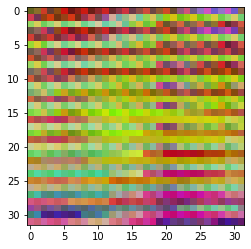

In [ ]:
# showcase result of autoencoder on a random image from test dataset

# display original
plt.imshow(x_test[j].reshape(32,32,3))
plt.show()

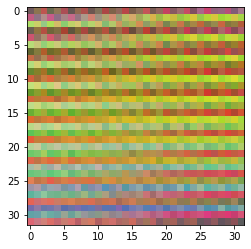

In [ ]:
# display reconstruction
plt.imshow(x_test2[j].reshape(32,32,3))
plt.show()

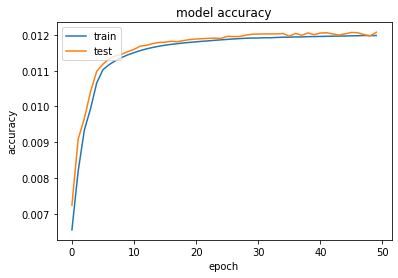

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

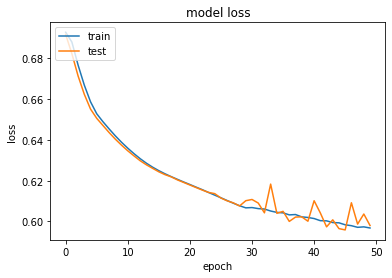

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**CNN Model**


2D convolutinal model

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32,32,3), kernel_constraint=maxnorm(3)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               4194816   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0

In [ ]:

# Compile model
epochs = 50
lrate = 0.01
decay = lrate/epochs
sgd = keras.optimizers.SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [ ]:
# Fit the model
historynew = model.fit(x_train2, y_train, validation_data=(x_test2, y_test), epochs=epochs, batch_size=32)

Epoch 1/50
1563/1563 [==============================] - 224s 143ms/step - loss: 1.9100 - accuracy: 0.3036 - val_loss: 1.6872 - val_accuracy: 0.3988
Epoch 2/50
1563/1563 [==============================] - 225s 144ms/step - loss: 1.6987 - accuracy: 0.3876 - val_loss: 1.6291 - val_accuracy: 0.4165
Epoch 3/50
1563/1563 [==============================] - 223s 142ms/step - loss: 1.6362 - accuracy: 0.4133 - val_loss: 1.5712 - val_accuracy: 0.4353
Epoch 4/50
1563/1563 [==============================] - 226s 144ms/step - loss: 1.5897 - accuracy: 0.4290 - val_loss: 1.5603 - val_accuracy: 0.4466
Epoch 5/50
1563/1563 [==============================] - 228s 146ms/step - loss: 1.5535 - accuracy: 0.4451 - val_loss: 1.5191 - val_accuracy: 0.4603
Epoch 6/50
1563/1563 [==============================] - 226s 145ms/step - loss: 1.5203 - accuracy: 0.4550 - val_loss: 1.5145 - val_accuracy: 0.4590
Epoch 7/50
1563/1563 [==============================] - 225s 144ms/step - loss: 1.4962 - accuracy: 0.4667 - val_

In [ ]:
# Final evaluation of the model
scores = model.evaluate(x_test2, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 49.99%


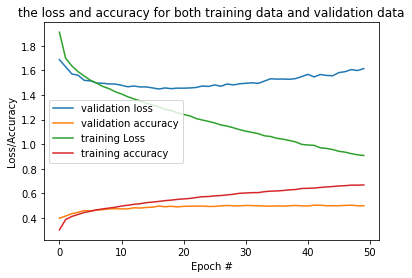

In [ ]:
plt.figure()
plt.plot(np.arange(0, 50), historynew.history["val_loss"], label="validation loss")
plt.plot(np.arange(0, 50), historynew.history["val_accuracy"], label="validation accuracy")
plt.plot(np.arange(0, 50), historynew.history["loss"], label="training Loss")
plt.plot(np.arange(0, 50), historynew.history["accuracy"], label="training accuracy")
plt.title("the loss and accuracy for both training data and validation data")
plt.xlabel("Epoch 50")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="best")

**PCA + CNN**

In [ ]:
x_train = x_train.reshape(-1, 3072)
x_test = x_test.reshape(-1, 3072)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(50000, 3072)
(10000, 3072)


Apply standard scaler to data

In [ ]:
stdscale_train = x_train
stdscale_test = x_test

In [ ]:
standardscaler = StandardScaler()

PCA 

In [ ]:
pca = PCA()

In [ ]:
pca.fit(stdscale_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
pca.n_components_

3072

In [ ]:
pca.explained_variance_

array([4.54757193e+01, 2.01243187e+01, 1.13643690e+01, ...,
       3.54224980e-07, 3.51079342e-07, 3.45064901e-07])

In [ ]:
pca.explained_variance_.shape

(3072,)

In [ ]:
x_train_pca = pca.transform(stdscale_train)
x_test_pca = pca.transform(stdscale_test)

In [ ]:
x_train_pca = x_train_pca.reshape(-1, 32,32,3)
x_test_pca = x_test_pca.reshape(-1, 32,32,3)

In [ ]:
print(x_train_pca.shape)
print(x_test_pca.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [ ]:
model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32,32,3), kernel_constraint=maxnorm(3)))
model1.add(layers.Dropout(0.2))
model1.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model1.add(layers.MaxPooling2D(pool_size=(2, 2)))
model1.add(layers.Flatten())
model1.add(layers.Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model1.add(layers.Dropout(0.5))
model1.add(layers.Dense(num_classes, activation='softmax'))
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_2 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)              

In [ ]:
epochs = 5
lrate = 0.01
decay = lrate/epochs
sgd = keras.optimizers.SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model1.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [ ]:
historynew1 = model1.fit(x_train_pca, y_train, validation_data=(x_test_pca, y_test), epochs=epochs, batch_size=32)

Epoch 1/5
1563/1563 [==============================] - 258s 165ms/step - loss: 1.8541 - accuracy: 0.3325 - val_loss: 1.7286 - val_accuracy: 0.3795
Epoch 2/5
1563/1563 [==============================] - 258s 165ms/step - loss: 1.7113 - accuracy: 0.3853 - val_loss: 1.7005 - val_accuracy: 0.3954
Epoch 3/5
1563/1563 [==============================] - 259s 166ms/step - loss: 1.6693 - accuracy: 0.3983 - val_loss: 1.6569 - val_accuracy: 0.4079
Epoch 4/5
1563/1563 [==============================] - 239s 153ms/step - loss: 1.6490 - accuracy: 0.4084 - val_loss: 1.6754 - val_accuracy: 0.4012
Epoch 5/5
1563/1563 [==============================] - 232s 148ms/step - loss: 1.6303 - accuracy: 0.4141 - val_loss: 1.6802 - val_accuracy: 0.4012


In [ ]:
# Final evaluation of the model
scores = model1.evaluate(x_test_pca, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 10.59%


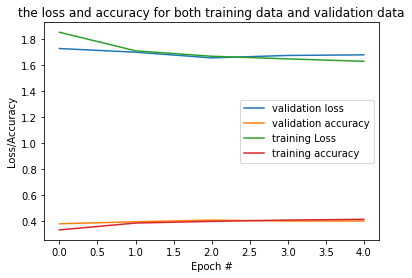

In [ ]:
plt.figure()
plt.plot( historynew1.history["val_loss"], label="validation loss")
plt.plot( historynew1.history["val_accuracy"], label="validation accuracy")
plt.plot( historynew1.history["loss"], label="training Loss")
plt.plot( historynew1.history["accuracy"], label="training accuracy")
plt.title("the loss and accuracy for both training data and validation data")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="best")
# historynew1.history